**INFORMATION**
* **ID:** 20127039
* **Name:** Tran Dam Gia Huy
* **Class:** 20CLC08

**IMPORT LIBRARY**

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageColor


**IMAGE HANDLE**

In [14]:
def ReadImage(imgName):
    imgOrg=Image.open(imgName)
    return imgOrg

def ImageToArray(imgName):
    imgArr=np.asarray(imgName)
    imgRes = np.reshape(imgArr, (imgArr.shape[0] * imgArr.shape[1], imgArr.shape[2]))
    return imgArr, imgRes

def RecoverShape(img2d, img3d):
    img2d = np.reshape(img2d, (img3d.shape[0], img3d.shape[1], img3d.shape[2]))
    return img2d

**INPUT HANDLE**

In [15]:
def Input():
    
    # Input image name
    imgName = input('Enter image name: ')

    # Input image format
    while(True):
        imgFormat = input('Enter output format ( pdf or png ): ')
        if(imgFormat=='pdf' or imgFormat=='png'): break
        
    #Input init_centroid
    while(True):
        init_centroid = input('Enter Centroids Initialization ( in_pixels or random ): ')
        if(init_centroid=='in_pixels' or init_centroid=='random'): break

    #Input the number of clusters
    k_clusters = int(input('Enter the number of clusters: '))
    return imgName, imgFormat, init_centroid, k_clusters


**KMEANS ALGORITHM**

In [16]:
def kmeans(img_1d, k_clusters, max_iter, init_centroids='random'):
    '''
    K-Means algorithm
    
    Inputs:
        img_1d : np.ndarray with shape=(height * width, num_channels)
            Original image in 1d array
        
        k_clusters : int
            Number of clusters
            
        max_iter : int
            Max iterator
            
        init_cluster : str
            The way which use to init centroids
            'random' --> centroid has `c` channels, with `c` is initial random in [0,255]
            'in_pixels' --> centroid is a random pixels of original image
            
    Outputs:
        centroids : np.ndarray with shape=(k_clusters, num_channels)
            Store color centroids
            
        labels : np.ndarray with shape=(height * width, )
            Store label for pixels (cluster's index on which the pixel belongs)
    
    '''
    
    ### YOUR CODE HERE

    # INITIALIZE VARIABLES
    centroids = []
    sample_Random_Array=[]
    labels = [ [] for i in range(k_clusters)]

    # INITIALIZE CENTROIDS
        # Random in pixels
    if(init_centroids=='in_pixels'):
        while(len(sample_Random_Array)!=k_clusters):
            while(True):
                temp=np.random.randint(img_1d.shape[0])
                if(temp not in sample_Random_Array):
                    sample_Random_Array.append(temp)
                    break
        for i in sample_Random_Array: 
            centroids.append(img_1d[i])

        # Free random in [0,255]
    if(init_centroids=='random'):
        while(len(centroids)!=k_clusters):
            while(True):
                temp=[np.random.randint(255) for i in range(3)]
                if(temp not in centroids):
                    centroids.append(temp)
                    break

    # UPDATE CLUSTERS AND CENTROIDS
    for i in range(max_iter):
        # clusters
        labels = [ [] for i in range(k_clusters)]
        for index, sample in enumerate(img_1d):
            minDis=10000; indexCluster=0
            for j in range(len(centroids)):
                if( np.linalg.norm(sample-centroids[j]) < minDis ):
                    minDis = np.linalg.norm(sample-centroids[j])
                    indexCluster = j
            labels[indexCluster].append(index)
            
        # centroids
        centroids=np.array([[0 for _ in range(img_1d.shape[1])] for _ in range(k_clusters)])
        for index, clus in enumerate(labels):
            if(len(clus)==0): continue
            centroids[index]=np.mean(img_1d[clus], axis=0)

    return centroids, labels
    


**CHANGE COLOR**

In [17]:
def ChangeColor(labels, centroids, img2d):
    for i in range(len(labels)):
        if(len(labels[i])!=0):
            for j in labels[i]: 
                img2d[j]=centroids[i]
    return img2d

**MAIN PROGRAM**

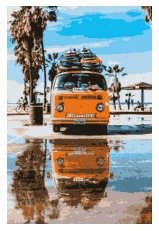

In [18]:
def main():
    #Input variables
    imgName, imgFormat, init_centroid, k_clusters = Input()
    
    # Read Image
    imgOrg=ReadImage(imgName)
    
    # Hide Axis
    plt.axis('off')
    plt.imshow(imgOrg)
    
    #Convert 3d image array to 2d image array 
    img3d, img2d = ImageToArray(imgOrg)

    #KMeans Algorithm
    centroids, labels = kmeans(img2d, k_clusters, 10, init_centroid)

    #Change color for each cluster
    img2d = ChangeColor(labels, centroids, img2d)

    #Recover 3d image array from 2d image array
    img2d = RecoverShape(img2d, img3d)

    # Save image
    plt.imshow(img2d)
    plt.savefig(f'{imgName.split(".")[0]}_out.{imgFormat}', bbox_inches = 'tight', pad_inches = 0)

main()